In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from pathlib import Path
import os.path
import warnings
warnings.filterwarnings('ignore')

In [47]:
train_csv = pd.read_csv('/kaggle/input/happy-whale-and-dolphin/train.csv')
train_csv.head()

,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392


In [48]:
train = '/kaggle/input/happy-whale-and-dolphin/train_images'

In [49]:
train_csv['image']  = train_csv['image'].apply(lambda x : train + '/'+ x)

In [50]:
train_csv.isna().sum()

image            0
species          0
individual_id    0
dtype: int64

In [51]:
train_csv.duplicated().sum()

0

In [52]:
train_csv['species'] = train_csv['species'].replace({
    'false_killer_whale' : 'killer_whale',
    'bottlenose_dolpin' : 'bottlenose_dolphin',
    'kiler_whale' : 'killer_whale',
    'short_finned_pilot_whale' : 'pilot_whale',
    'long_finned_pilot_whale' :  'pilot_whale',
    'pygmy_killer_whale' : 'killer_whale'
    
})

In [53]:
train_csv['species'].value_counts()

bottlenose_dolphin           10781
beluga                        7443
humpback_whale                7392
killer_whale                  5857
blue_whale                    4830
dusky_dolphin                 3139
spinner_dolphin               1700
melon_headed_whale            1689
minke_whale                   1608
fin_whale                     1324
gray_whale                    1123
pilot_whale                    867
southern_right_whale           866
spotted_dolphin                490
sei_whale                      428
common_dolphin                 347
cuviers_beaked_whale           341
white_sided_dolphin            229
brydes_whale                   154
pantropic_spotted_dolphin      145
globis                         116
commersons_dolphin              90
rough_toothed_dolphin           60
frasiers_dolphin                14
Name: species, dtype: int64

In [54]:
cat = train_csv['species'].value_counts().loc[lambda x : x < 1000].index.tolist()
for i in cat:
    drop = train_csv.loc[train_csv['species'] == i, 'species'].index.values.tolist()
    train_csv = train_csv.drop(drop, axis = 0)
train_csv.reset_index()

,index,image,species,individual_id
0,0,/kaggle/input/happy-whale-and-dolphin/train_im...,melon_headed_whale,cadddb1636b9
1,1,/kaggle/input/happy-whale-and-dolphin/train_im...,humpback_whale,1a71fbb72250
2,2,/kaggle/input/happy-whale-and-dolphin/train_im...,killer_whale,60008f293a2b
3,3,/kaggle/input/happy-whale-and-dolphin/train_im...,bottlenose_dolphin,4b00fe572063
4,4,/kaggle/input/happy-whale-and-dolphin/train_im...,humpback_whale,8e5253662392
...,...,...,...,...
46881,51027,/kaggle/input/happy-whale-and-dolphin/train_im...,fin_whale,40fe65946167
46882,51028,/kaggle/input/happy-whale-and-dolphin/train_im...,beluga,5ac053677ed1
46883,51030,/kaggle/input/happy-whale-and-dolphin/train_im...,blue_whale,5401612696b9
46884,51031,/kaggle/input/happy-whale-and-dolphin/train_im...,beluga,4000b3d7c24e


In [55]:
train_csv['species'].value_counts()

bottlenose_dolphin    10781
beluga                 7443
humpback_whale         7392
killer_whale           5857
blue_whale             4830
dusky_dolphin          3139
spinner_dolphin        1700
melon_headed_whale     1689
minke_whale            1608
fin_whale              1324
gray_whale             1123
Name: species, dtype: int64

# Extracting only 300 samples from each category

In [56]:
samples = []
for i in train_csv['species'].unique():
    x = train_csv.query('species == @i')
    samples.append(x.sample(300, random_state = 1))
train_csv = pd.concat(samples, axis = 0).sample(frac = 1.0, random_state = 1).reset_index()

In [59]:
train_csv['species'].value_counts()

minke_whale           300
dusky_dolphin         300
killer_whale          300
spinner_dolphin       300
melon_headed_whale    300
beluga                300
bottlenose_dolphin    300
humpback_whale        300
fin_whale             300
blue_whale            300
gray_whale            300
Name: species, dtype: int64

# Train Test Spliiting

In [61]:
train_df , test_df = train_test_split(train_csv, test_size = 0.30, shuffle = True, random_state = 1)
train_df

,index,image,species,individual_id
1218,1838,/kaggle/input/happy-whale-and-dolphin/train_im...,bottlenose_dolphin,b61c15e89c3c
341,11129,/kaggle/input/happy-whale-and-dolphin/train_im...,bottlenose_dolphin,5f48c2296a0e
2711,10959,/kaggle/input/happy-whale-and-dolphin/train_im...,beluga,985e7d6a8052
82,31883,/kaggle/input/happy-whale-and-dolphin/train_im...,humpback_whale,6bd07da59100
1234,7434,/kaggle/input/happy-whale-and-dolphin/train_im...,fin_whale,180c0ab04dcd
...,...,...,...,...
2763,50721,/kaggle/input/happy-whale-and-dolphin/train_im...,killer_whale,e33a507393ca
905,37548,/kaggle/input/happy-whale-and-dolphin/train_im...,melon_headed_whale,f1b0a3259be9
1096,37783,/kaggle/input/happy-whale-and-dolphin/train_im...,beluga,51081e431bca
235,26795,/kaggle/input/happy-whale-and-dolphin/train_im...,spinner_dolphin,e911390ae2a0


# Loading Images

In [62]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,validation_split = 0.2)
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input)

In [63]:
train_image = train_gen.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'image',
    y_col = 'species',
    target_size = (224, 224),
    color_mode ='rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = True,
    seed = 42,
    subset = 'training'
)
val_image = train_gen.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'image',
    y_col = 'species',
    target_size = (224, 224),
    color_mode ='rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = True,
    seed = 42,
    subset = 'validation'
)
test_image = test_gen.flow_from_dataframe(
    dataframe = test_df,
    x_col = 'image',
    y_col = 'species',
    target_size = (224, 224),
    color_mode ='rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = False
)

Found 1848 validated image filenames belonging to 11 classes.
Found 462 validated image filenames belonging to 11 classes.
Found 990 validated image filenames belonging to 11 classes.


# Training

In [64]:
pre_model = tf.keras.applications.MobileNetV2(
    input_shape = (224, 224, 3),
    include_top = False,
    pooling = 'avg'
)
pre_model.trainable = False

2022-12-15 02:03:20.402137: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 02:03:20.561642: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 02:03:20.562451: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 02:03:20.564312: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

9420800/9406464 [==============================] - 0s 0us/step


In [65]:
inputs = pre_model.input
x = tf.keras.layers.Dense(128, activation = 'relu')(pre_model.output)
x = tf.keras.layers.Dense(128, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(11,activation = 'softmax')(x)# 8 for 8 Classes
model = tf.keras.Model(inputs = inputs , outputs  = outputs)
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
history = model.fit(
    train_image,
    validation_data = val_image,
    epochs = 100,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            patience = 3,
            restore_best_weights = True
        )
    ]
)

2022-12-15 02:04:07.410189: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-12-15 02:04:12.958888: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


58/58 [==============================] - 195s 3s/step - loss: 1.2556 - accuracy: 0.5741 - val_loss: 0.8244 - val_accuracy: 0.7186
Epoch 2/100
58/58 [==============================] - 147s 3s/step - loss: 0.6173 - accuracy: 0.7949 - val_loss: 0.5982 - val_accuracy: 0.8030
Epoch 3/100
58/58 [==============================] - 147s 3s/step - loss: 0.3955 - accuracy: 0.8761 - val_loss: 0.6082 - val_accuracy: 0.7965
Epoch 4/100
58/58 [==============================] - 149s 3s/step - loss: 0.2824 - accuracy: 0.9107 - val_loss: 0.5638 - val_accuracy: 0.8182
Epoch 5/100
58/58 [==============================] - 149s 3s/step - loss: 0.2101 - accuracy: 0.9410 - val_loss: 0.5565 - val_accuracy: 0.8074
Epoch 6/100
58/58 [==============================] - 148s 3s/step - loss: 0.1372 - accuracy: 0.9600 - val_loss: 0.6111 - val_accuracy: 0.8074
Epoch 7/100
58/58 [==============================] - 159s 3s/step - loss: 0.0971 - accuracy: 0.9816 - val_loss: 0.6659 - val_accuracy: 0.7944
Epoch 8/100
58/58 

# Results


Test Accuracy : 78.59%



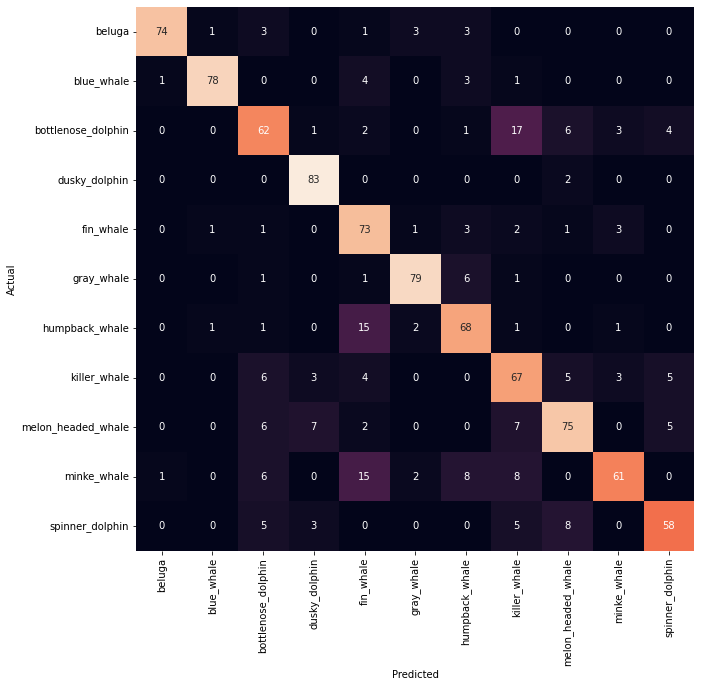

classification Report------------>
                    precision    recall  f1-score   support

            beluga       0.97      0.87      0.92        85
        blue_whale       0.96      0.90      0.93        87
bottlenose_dolphin       0.68      0.65      0.66        96
     dusky_dolphin       0.86      0.98      0.91        85
         fin_whale       0.62      0.86      0.72        85
        gray_whale       0.91      0.90      0.90        88
    humpback_whale       0.74      0.76      0.75        89
      killer_whale       0.61      0.72      0.66        93
melon_headed_whale       0.77      0.74      0.75       102
       minke_whale       0.86      0.60      0.71       101
   spinner_dolphin       0.81      0.73      0.77        79

          accuracy                           0.79       990
         macro avg       0.80      0.79      0.79       990
      weighted avg       0.80      0.79      0.79       990



In [66]:
results = model.evaluate(test_image, verbose = 0)
pred = np.argmax(model.predict(test_image), axis = 1)
class_names = list(test_image.class_indices.keys())
cm = confusion_matrix(test_image.labels, pred, labels = np.arange(11))
clr = classification_report(test_image.labels, pred, labels = np.arange(11),target_names = class_names)
print(f'\nTest Accuracy : {round(results[1], 4)*100}%\n')
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True, fmt = 'g', vmin = 0, cbar = False)
plt.xticks(ticks = np.arange(11) + 0.5, labels = class_names, rotation = 90)
plt.yticks(ticks = np.arange(11) + 0.5, labels = class_names, rotation = 0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(f'classification Report------------>\n{clr}')

In [73]:
submission_df = pd.DataFrame({
    'test_labels' : test_image.labels,
    'predicted_labels' : pred
})
submission_df.head(20)

,test_labels,predicted_labels
0,0,0
1,9,2
2,0,0
3,4,4
4,5,5
5,5,6
6,8,8
7,4,4
8,6,6
9,6,6


In [74]:
submission_df.to_csv('submission.csv', index=False)